# Estimativa Salarial Usando Modelos de Regressão

## Imports

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree

## Dataset

In [48]:
df = pd.read_csv('data_cleaned_2021.csv')

## Análise inicial


In [49]:
df.shape

(742, 42)

In [50]:
#show all columns
pd.set_option('display.max_columns', None)
#show all rows
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [52]:
df.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df.isnull().sum() * 100 / df.shape[0]

index                 0.0
Job Title             0.0
Salary Estimate       0.0
Job Description       0.0
Rating                0.0
Company Name          0.0
Location              0.0
Headquarters          0.0
Size                  0.0
Founded               0.0
Type of ownership     0.0
Industry              0.0
Sector                0.0
Revenue               0.0
Competitors           0.0
Hourly                0.0
Employer provided     0.0
Lower Salary          0.0
Upper Salary          0.0
Avg Salary(K)         0.0
company_txt           0.0
Job Location          0.0
Age                   0.0
Python                0.0
spark                 0.0
aws                   0.0
excel                 0.0
sql                   0.0
sas                   0.0
keras                 0.0
pytorch               0.0
scikit                0.0
tensor                0.0
hadoop                0.0
tableau               0.0
bi                    0.0
flink                 0.0
mongo                 0.0
google_an   

<Axes: >

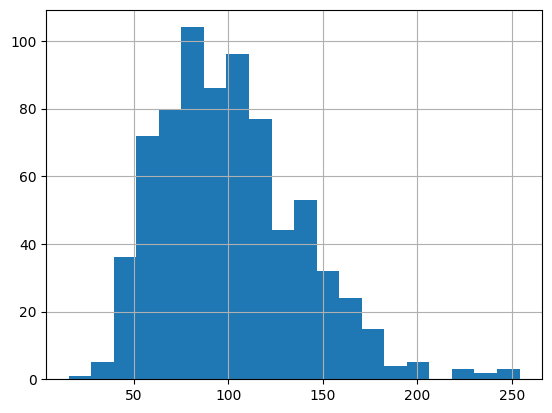

In [54]:
df['Avg Salary(K)'].hist(bins=20)

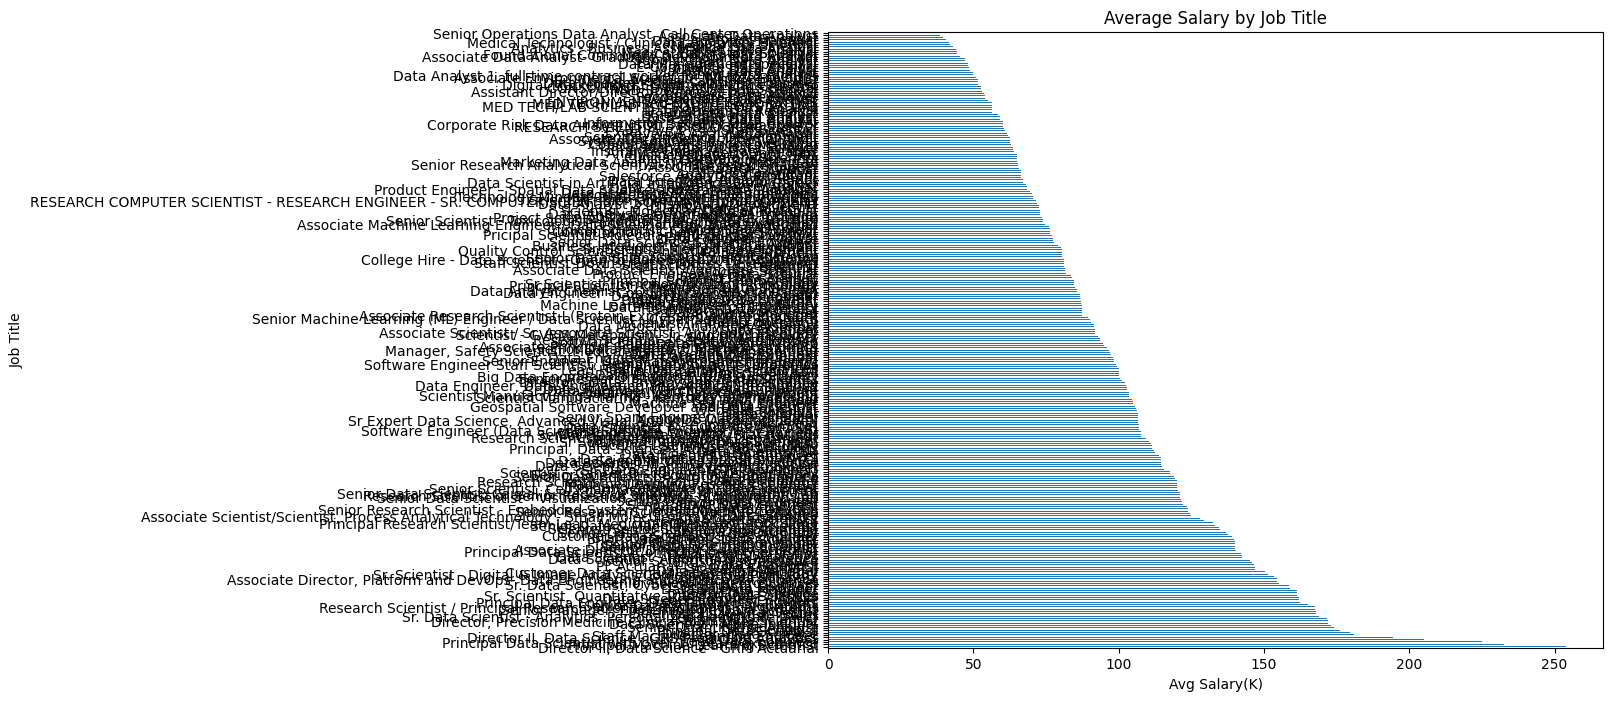

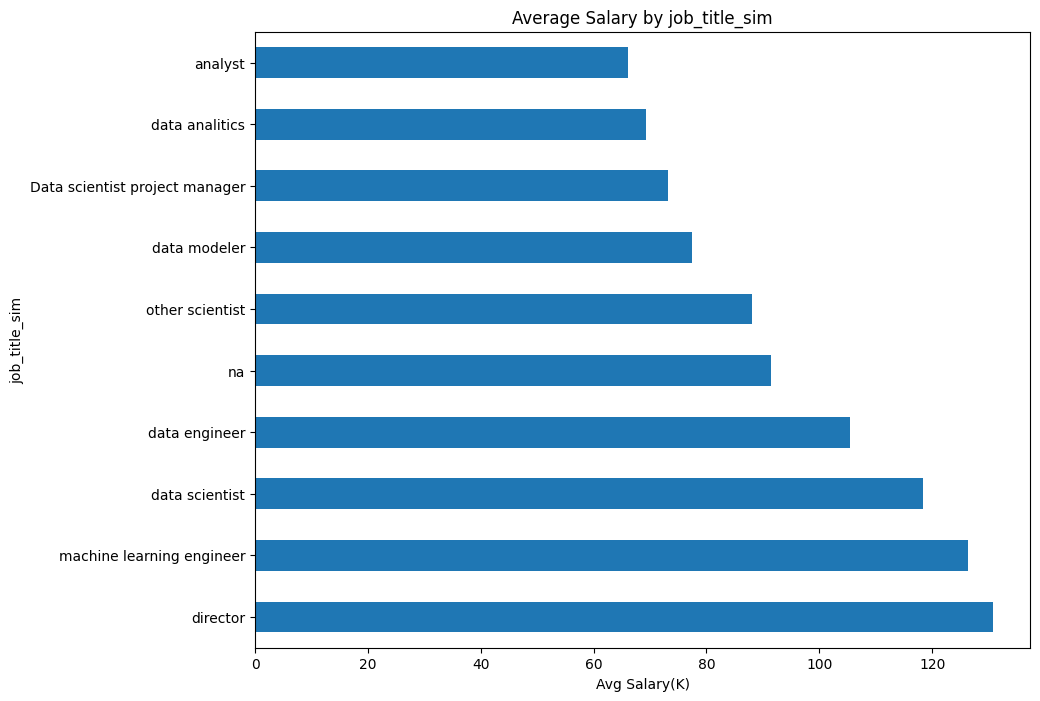

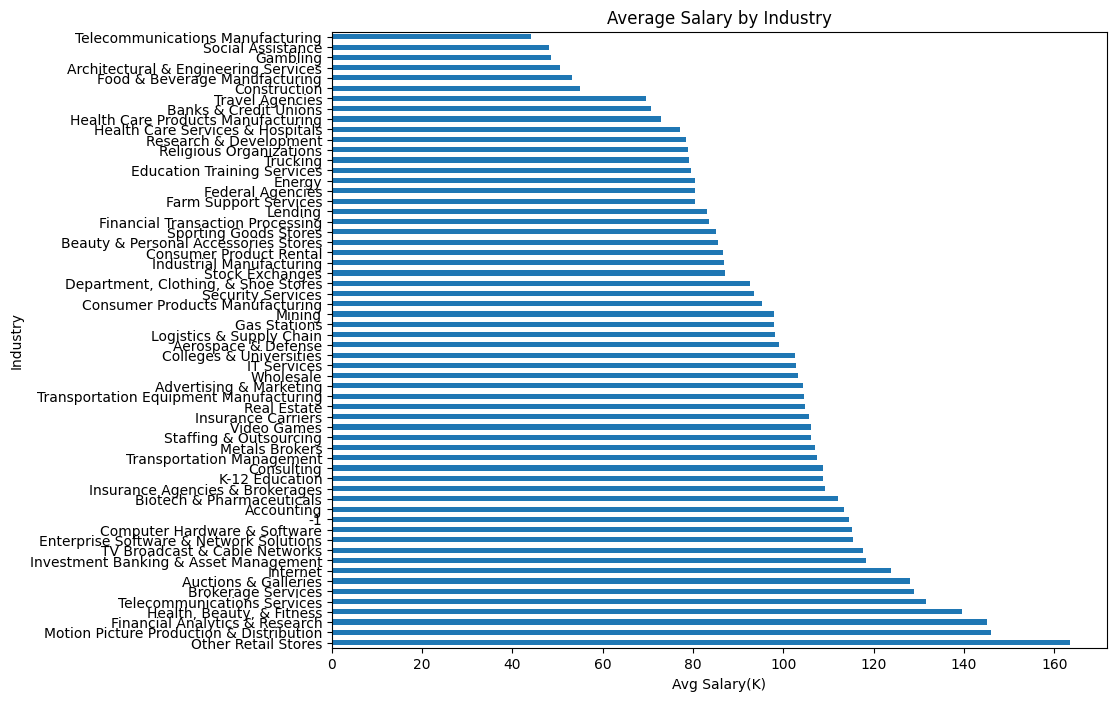

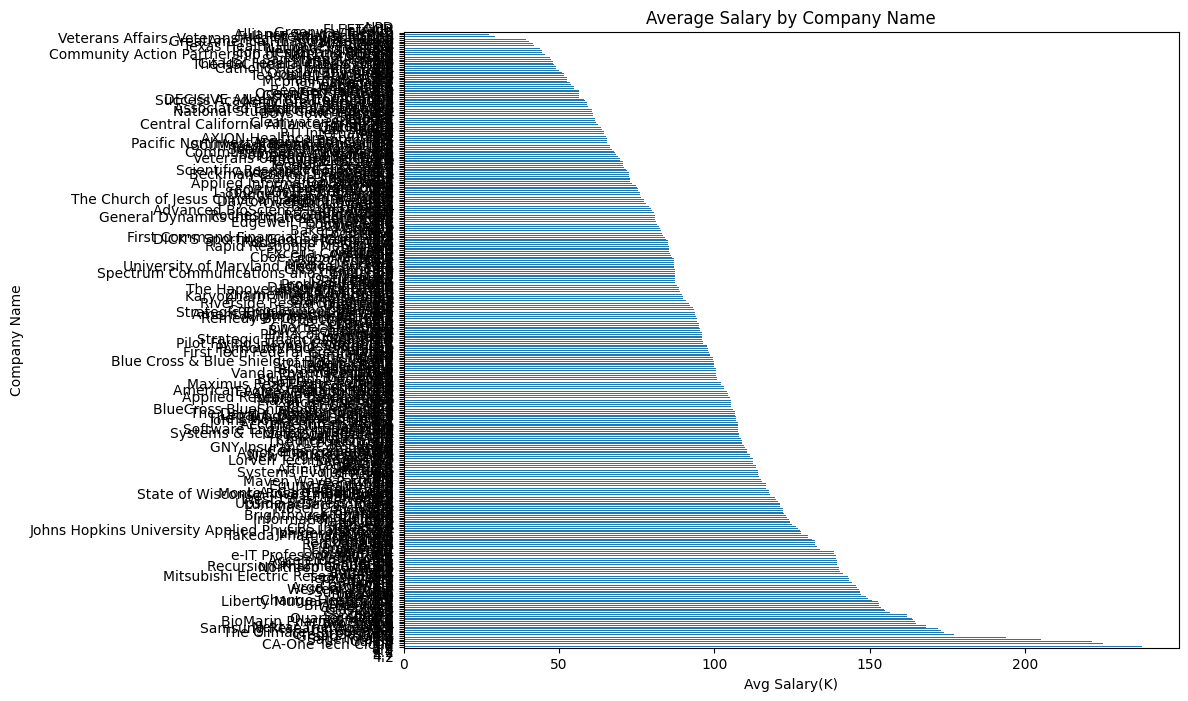

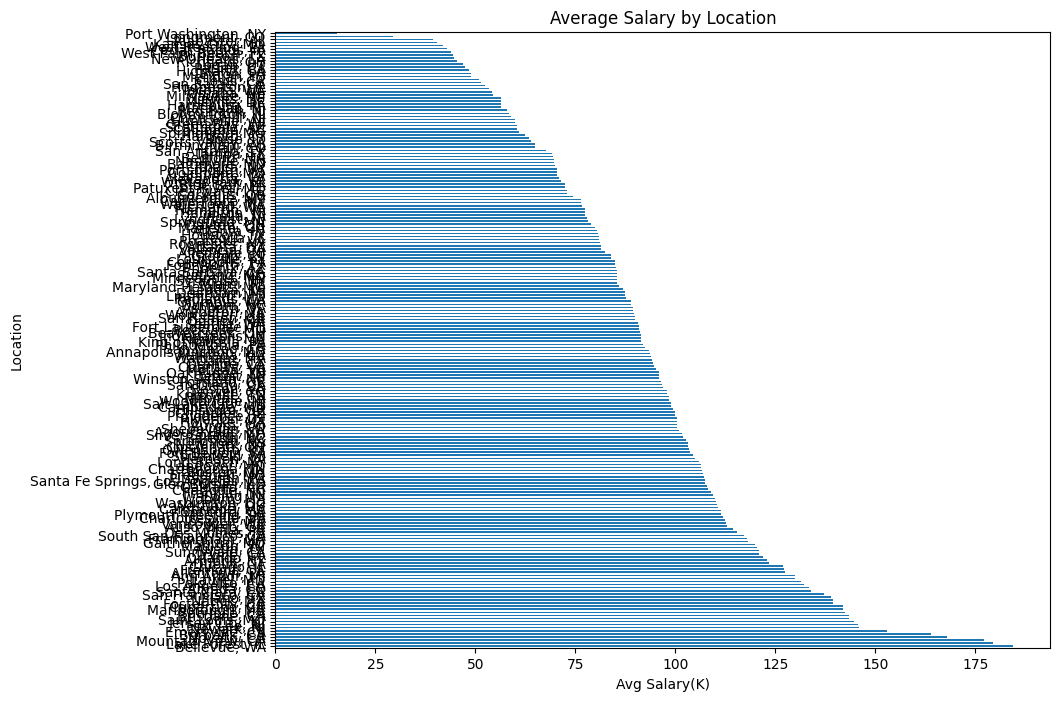

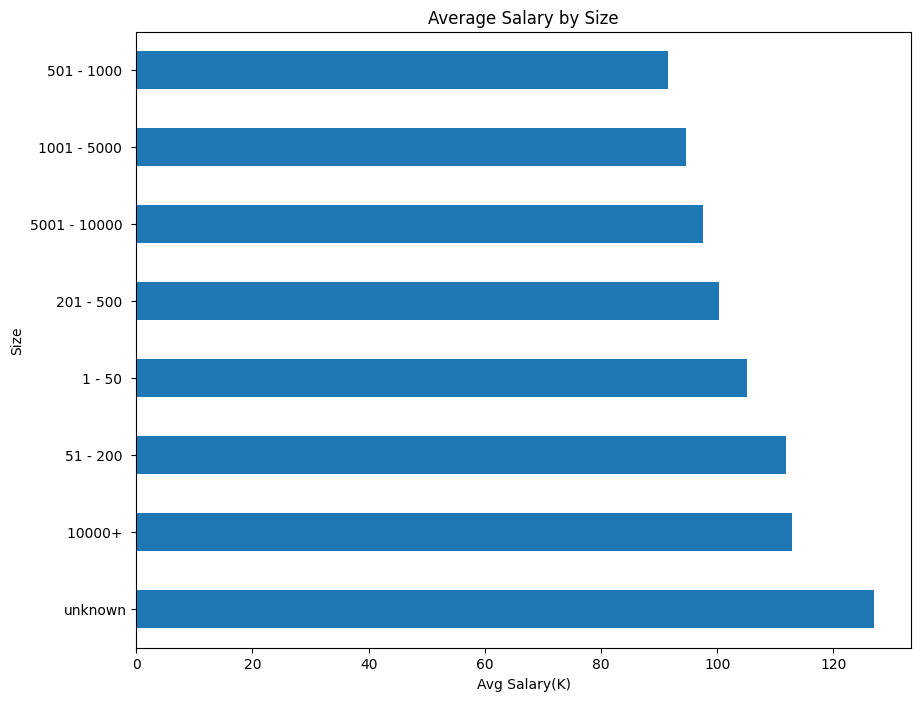

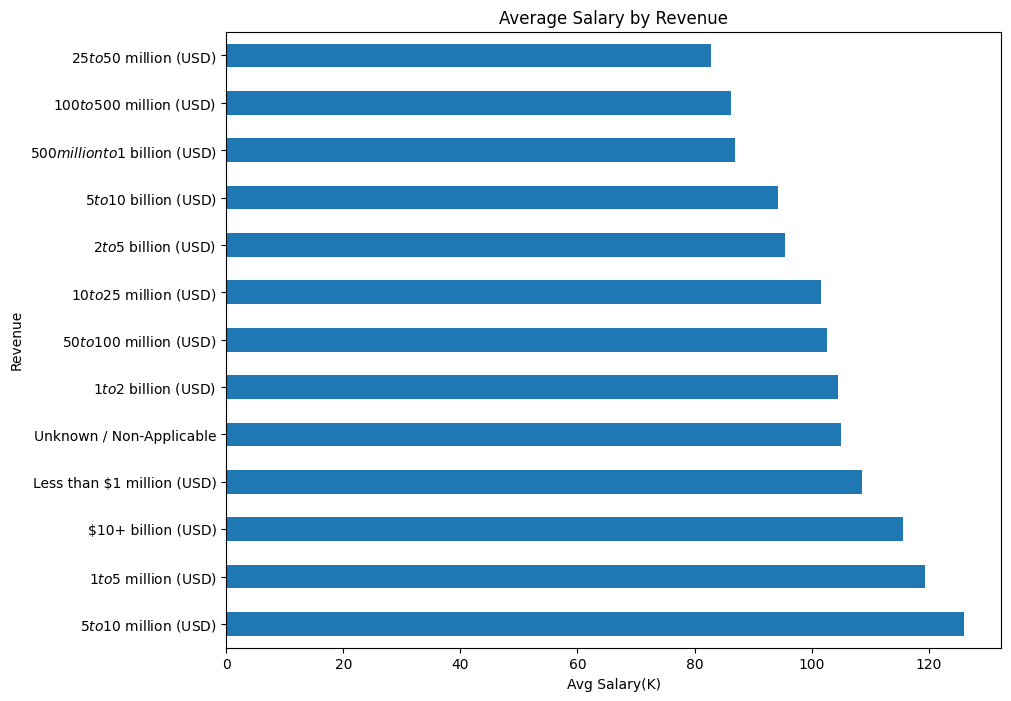

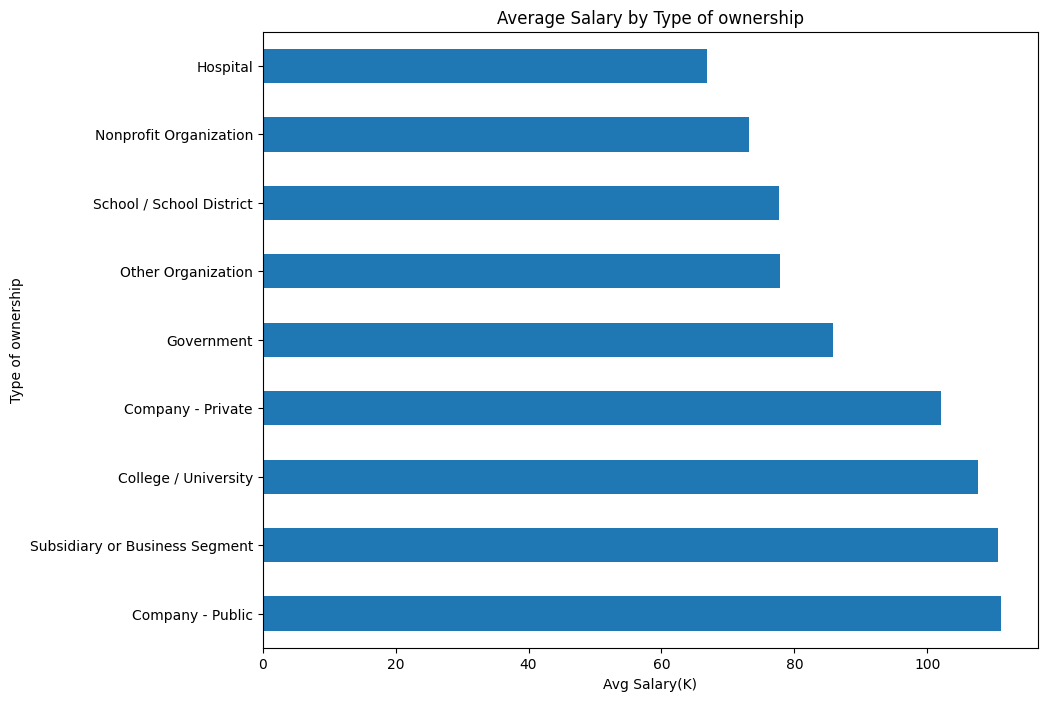

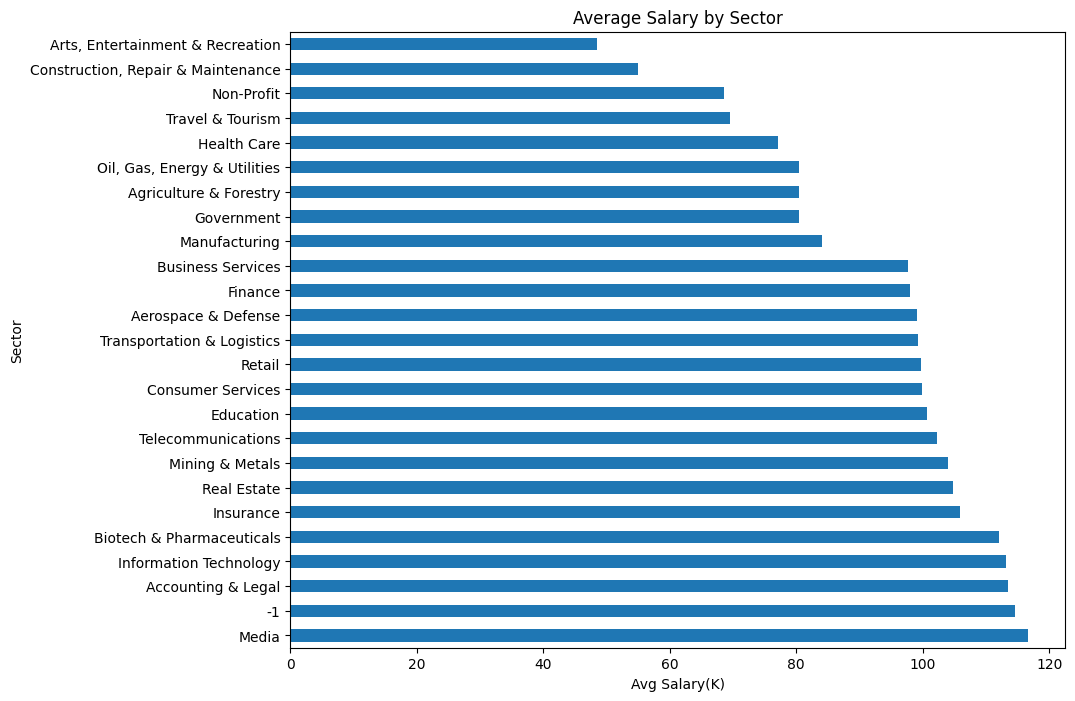

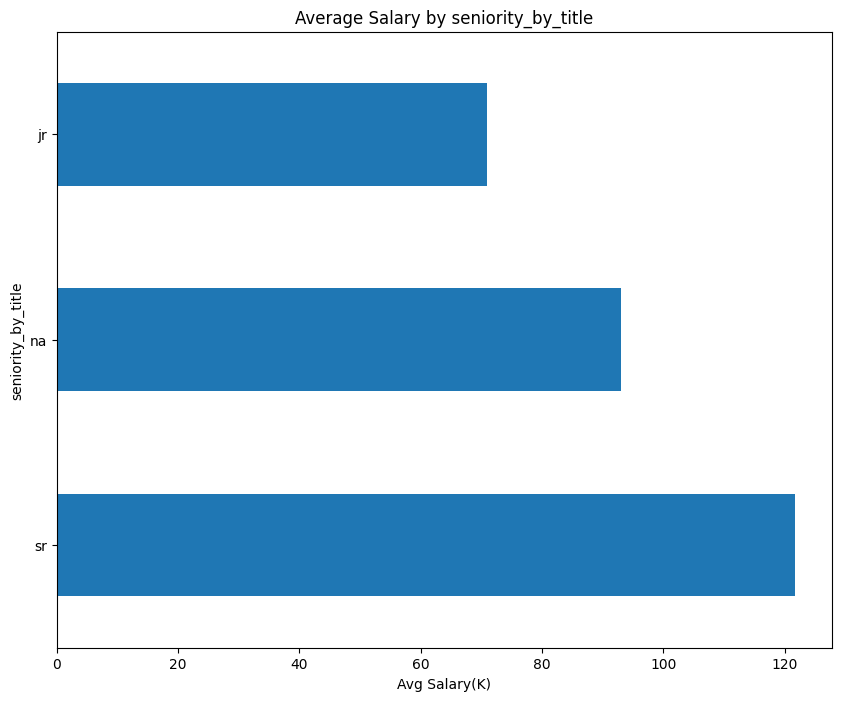

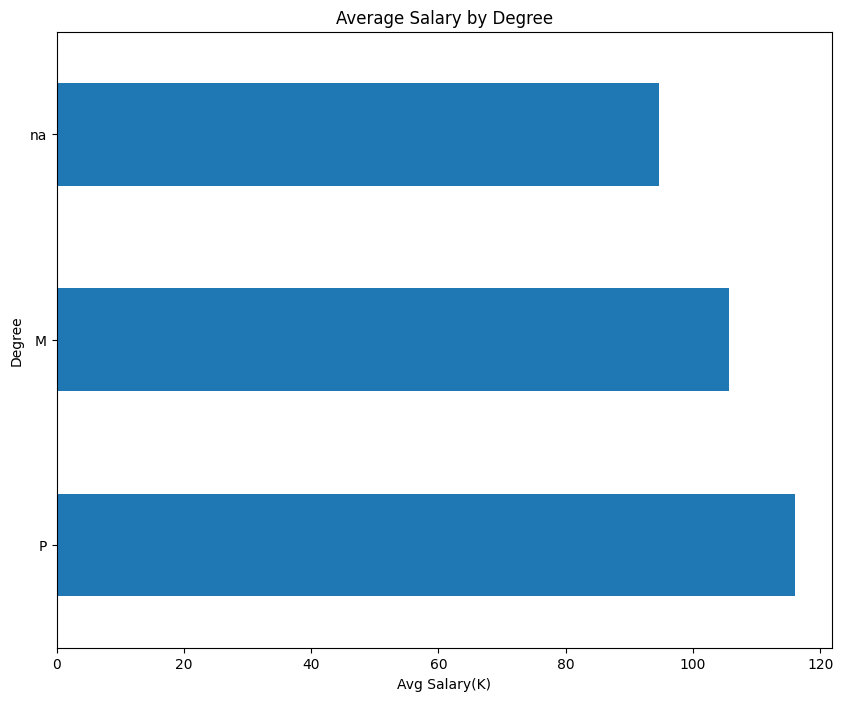

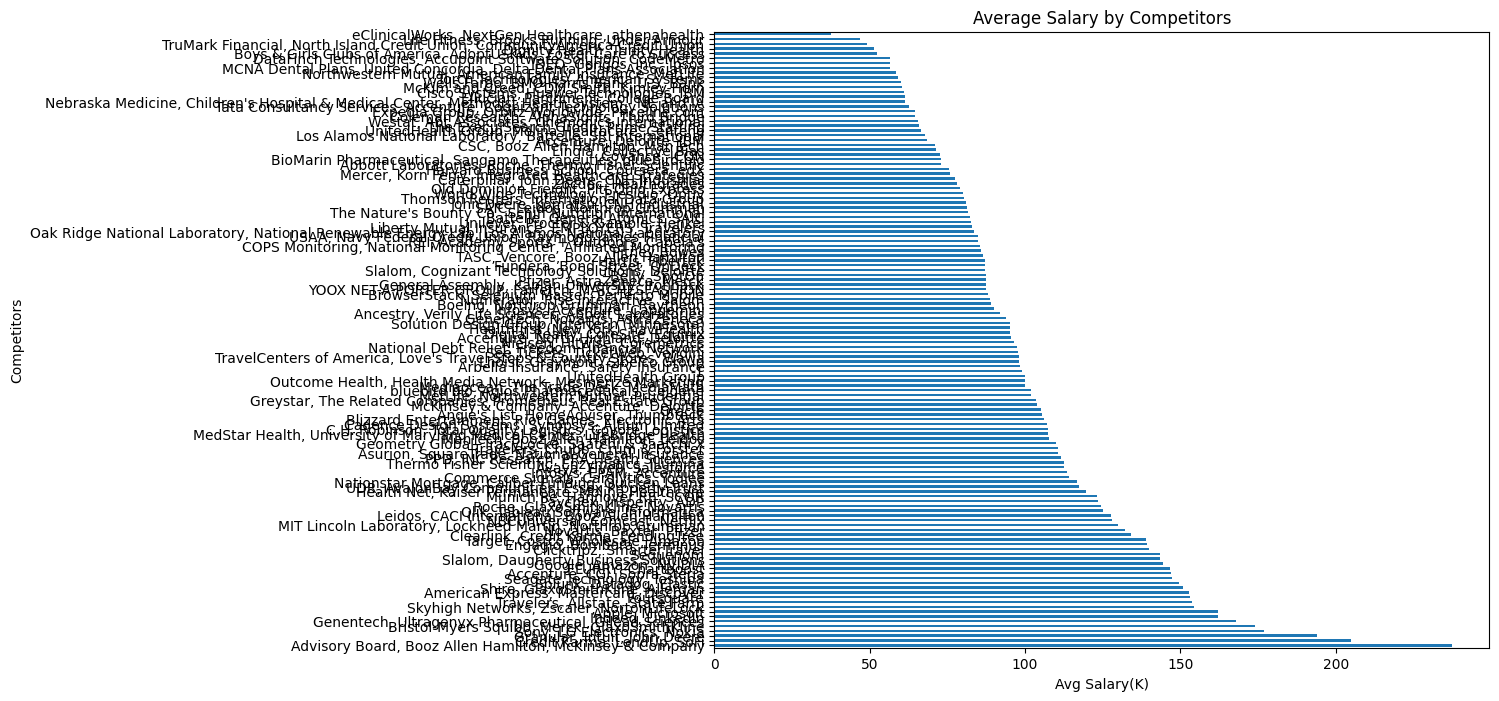

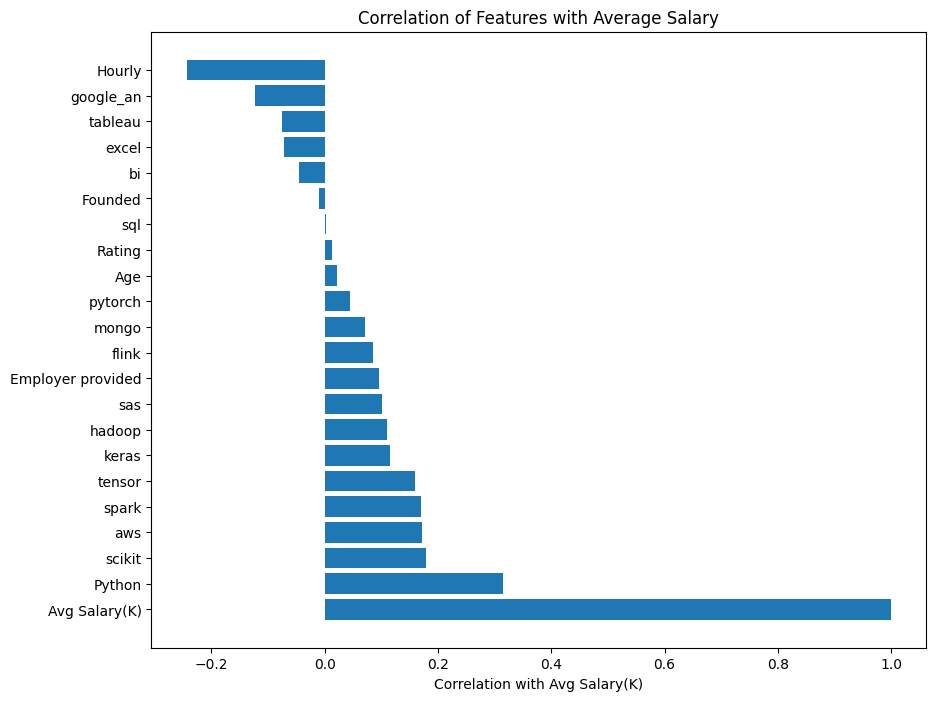

In [71]:
def plot_avg_salary_by_category(df, category_col):
    avg_salary = df.groupby(category_col)['Avg Salary(K)'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 8))
    avg_salary.plot(kind='barh')
    plt.title(f'Average Salary by {category_col}')
    plt.xlabel('Avg Salary(K)')
    plt.show()

category_columns = ['Job Title', 'job_title_sim', 'Industry', 'Company Name', 'Location', 'Size', 'Revenue', 'Type of ownership', 'Sector', 'seniority_by_title', 'Degree', 'Competitors']

for category in category_columns:
    plot_avg_salary_by_category(df, category)


skill_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
                 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

# Ter certeza de que as colunas de habilidades são do tipo int
df[skill_columns] = df[skill_columns].fillna(0).astype(int)

# Adicionar essas colunas numéricas à análise
df_corr = df[['Avg Salary(K)', 'Rating', 'Founded', 'Age', 'Employer provided', 'Hourly'] + skill_columns]

# Calcular correlação e ordenar
correlation = df_corr.corr()
corr_with_salary = correlation['Avg Salary(K)'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(corr_with_salary.index, corr_with_salary.values)
plt.xlabel('Correlation with Avg Salary(K)')
plt.title('Correlation of Features with Average Salary')
plt.show()


## Pré-processamento e limpeza

In [ ]:
# Como tratar elementos nulos?
df_clean = df.dropna(axis=0)

# Quais colunas devem ser removidas?
features = df_clean.drop(
    columns=[
        'index',            # Índice não é uma feature relevante
        'Salary Estimate',  # Devemos remover por tratar também do target??
        'Job Title',        # Devemos remover por ter diferentes formas de escrever o mesmo título?
        'Job Description',  # Descrição trata de coisas diferentes podendo não ser interessante para o modelo
        'Job Location',     # Temos a informação da localização na coluna 'Location'
        'Lower Salary',     # Devemos remover por tratar também do target??
        'Upper Salary',     # Devemos remover por tratar também do target??
        'Competitors',
        'Rating',           # Devemos remover por não ser relevante para o modelo
        'Founded',          # Devemos remover por não ser relevante para o modelo
        'Avg Salary(K)'     # Devemos remover por ser o target
        ])
features = df_clean[['Job Title']]
target = df_clean['Avg Salary(K)']

# Como tratar colunas categóricas:
features_encoded = pd.get_dummies(features, drop_first=True)

## Datasets de treino e teste

In [57]:
# Divida os dados em conjuntos de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

## Treinamento e teste

### GridSearch e Cross-validation

#### Ridge (Regressão Linear com regularização L2)

In [58]:
# lr = LinearRegression()
# lr.fit(X_train, y_train)
# y_pred_lin = lr.predict(X_test)

param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

ridge = Ridge(random_state=42)

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_ridge.fit(X_train, y_train)
y_pred_lin = grid_ridge.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


#### Árvore de decisão

In [59]:
# dt = DecisionTreeRegressor(max_depth=4, random_state=42)
# dt.fit(X_train, y_train)
# y_pred_tree = dt.predict(X_test)

param_grid_dt = {
    'max_depth': [None, 1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01],
    'max_leaf_nodes': [None, 10, 20, 30]
}

dt = DecisionTreeRegressor(random_state=42)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)

y_pred_tree = grid_dt.predict(X_test)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


#### Random forest

In [60]:
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)

param_grid_rf = {
    'n_estimators': [50, 100, 200],         # Número de árvores na floresta
    'max_depth': [None, 2, 3, 4],           # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],        # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4],          # Número mínimo de amostras necessárias em um nó folha
    'max_features': [None, 'sqrt', 'log2'], # Número de recursos a serem considerados ao procurar a melhor divisão
    'ccp_alpha': [0.0, 0.001, 0.01]         # Parâmetro de complexidade para poda   
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01],
                         'max_depth': [None, 2, 3, 4],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=1)

### Combinações de parâmetros

In [61]:
results_ridge = pd.DataFrame(grid_ridge.cv_results_)
results_ridge = results_ridge.sort_values(by='mean_test_score', ascending=False)
results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007132,0.000373,0.002311,0.000513,0.1,{'alpha': 0.1},0.534692,0.634088,0.693555,0.430464,0.604833,0.579526,0.090388,1
1,0.007429,0.000972,0.002109,0.000203,1.0,{'alpha': 1.0},0.448125,0.516883,0.574813,0.389613,0.504581,0.486803,0.063101,2
2,0.007425,0.000974,0.002312,0.000507,10.0,{'alpha': 10.0},0.173389,0.181877,0.214908,0.168032,0.197717,0.187185,0.017116,3
3,0.006832,0.000250,0.001799,0.000400,100.0,{'alpha': 100.0},0.029306,0.035864,0.023417,0.027389,0.040526,0.031300,0.006122,4


In [62]:
results_dt = pd.DataFrame(grid_dt.cv_results_)
results_dt = results_dt.sort_values(by='mean_test_score', ascending=False)
results_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1694,0.005255,0.000735,0.002180,0.000280,0.01,None,log2,None,1,10,"{'ccp_alpha': 0.01, 'max_depth': None, 'max_fe...",0.536326,0.633372,0.734736,0.411940,0.591982,0.581671,0.106839,1
614,0.005718,0.001127,0.002205,0.000817,0.001,None,log2,None,1,10,"{'ccp_alpha': 0.001, 'max_depth': None, 'max_f...",0.536053,0.633372,0.734736,0.411940,0.591982,0.581616,0.106862,2
74,0.005610,0.000801,0.002512,0.002060,0.0,None,log2,None,1,10,"{'ccp_alpha': 0.0, 'max_depth': None, 'max_fea...",0.536053,0.633372,0.734736,0.411940,0.591982,0.581616,0.106862,2
1154,0.005332,0.000690,0.002308,0.000400,0.005,None,log2,None,1,10,"{'ccp_alpha': 0.005, 'max_depth': None, 'max_f...",0.536053,0.633372,0.734736,0.411940,0.591982,0.581616,0.106862,2
1657,0.005847,0.000145,0.002327,0.001162,0.01,None,sqrt,None,1,5,"{'ccp_alpha': 0.01, 'max_depth': None, 'max_fe...",0.520200,0.608631,0.747643,0.357993,0.604346,0.567762,0.127774,5


In [63]:
results_rf = pd.DataFrame(grid_rf.cv_results_)
results_rf = results_rf.sort_values(by='mean_test_score', ascending=False)
results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
708,0.126439,0.015557,0.007122,0.000979,0.01,None,log2,1,10,50,"{'ccp_alpha': 0.01, 'max_depth': None, 'max_fe...",0.481744,0.577908,0.654025,0.368048,0.558452,0.528035,0.096979,1
60,0.108822,0.004489,0.006924,0.000371,0.0,None,log2,1,10,50,"{'ccp_alpha': 0.0, 'max_depth': None, 'max_fea...",0.481746,0.577907,0.654023,0.368065,0.558427,0.528033,0.096971,2
384,0.114783,0.002795,0.007326,0.000591,0.001,None,log2,1,10,50,"{'ccp_alpha': 0.001, 'max_depth': None, 'max_f...",0.481744,0.577909,0.654030,0.368051,0.558427,0.528032,0.096978,3
386,0.515551,0.070146,0.024502,0.006511,0.001,None,log2,1,10,200,"{'ccp_alpha': 0.001, 'max_depth': None, 'max_f...",0.483612,0.556624,0.654043,0.373988,0.560123,0.525678,0.093168,4
710,0.476418,0.020287,0.023200,0.001808,0.01,None,log2,1,10,200,"{'ccp_alpha': 0.01, 'max_depth': None, 'max_fe...",0.483602,0.556617,0.654052,0.373993,0.560124,0.525677,0.093169,5


### Resultados e predição

In [64]:
print("Ridge →", grid_ridge.best_params_, " | Best Score (neg MSE):", grid_ridge.best_score_)
print("Decision Tree →", grid_dt.best_params_, " | Best Score (neg MSE):", grid_dt.best_score_)
print("Random Forest →", grid_rf.best_params_, " | Best Score (neg MSE):", grid_rf.best_score_)

best_ridge = grid_ridge.best_estimator_
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)
y_pred_dt = best_dt.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

Ridge → {'alpha': 0.1}  | Best Score (neg MSE): 0.5795264665949145
Decision Tree → {'ccp_alpha': 0.01, 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10}  | Best Score (neg MSE): 0.5816709898126979
Random Forest → {'ccp_alpha': 0.01, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}  | Best Score (neg MSE): 0.5280353461147078


## Medidas de desempenho

In [65]:
def print_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

print_metrics(y_test, y_pred_ridge, "LR") # Regressão Linear
print_metrics(y_test, y_pred_dt, "DT") # Árvore de decisão
print_metrics(y_test, y_pred_rf, "RF") # Random Forest

LR -> MAE: 15.35, MSE: 641.66, RMSE: 25.33, R²: 0.5909
DT -> MAE: 14.43, MSE: 642.45, RMSE: 25.35, R²: 0.5904
RF -> MAE: 18.51, MSE: 720.78, RMSE: 26.85, R²: 0.5405


## Plot

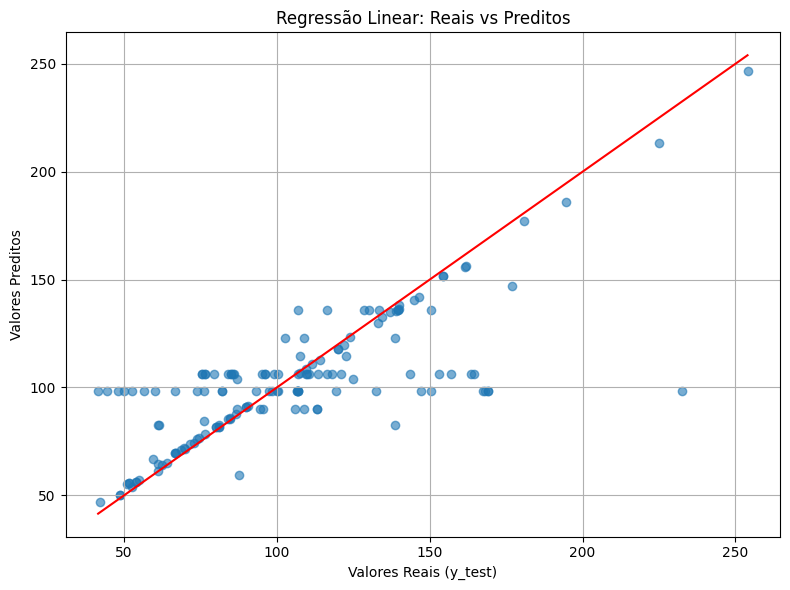

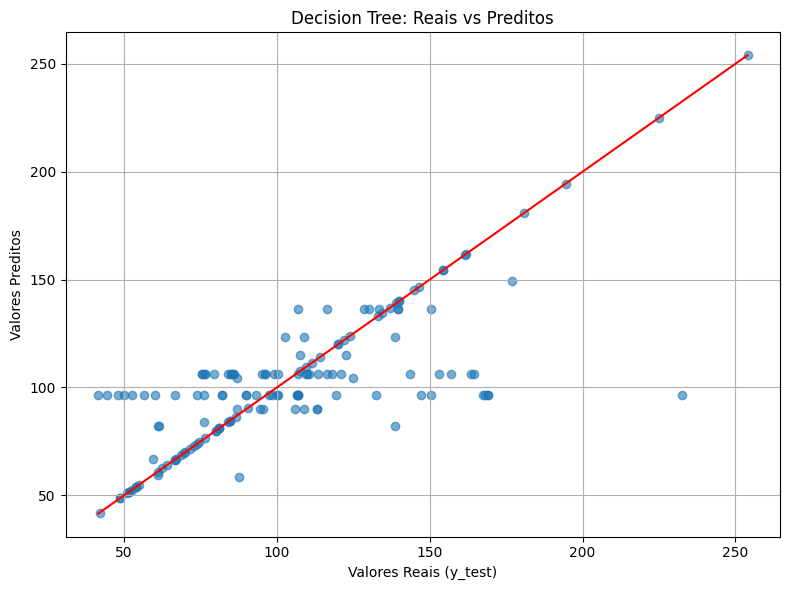

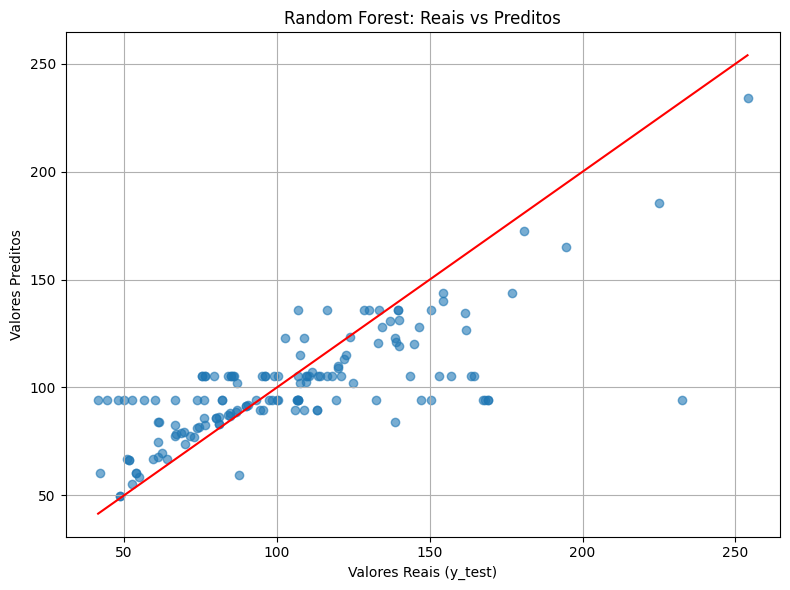

In [66]:
def plot_predicted_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)

    lim_min = min(y_true.min(), y_pred.min())
    lim_max = max(y_true.max(), y_pred.max())
    plt.plot([lim_min, lim_max], [lim_min, lim_max], color='red')

    plt.xlabel("Valores Reais (y_test)")
    plt.ylabel("Valores Preditos")
    plt.title(f"{model_name}: Reais vs Preditos")

    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predicted_vs_actual(y_test, y_pred_lin, "Regressão Linear")
plot_predicted_vs_actual(y_test, y_pred_tree, "Decision Tree")
plot_predicted_vs_actual(y_test, y_pred_rf, "Random Forest")